# BEGINNER LEVEL TASK: HOUSE PRICE PREDICTION
# Description: Develop a simple linear regression model to predict house prices based on the size of the house in square feet.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Load the Dataset
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data.shape

(1460, 81)

In [4]:
print(f'There are {len(data.columns)} Columns :\n{data.columns.values}')

There are 81 Columns :
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'M

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
# Drop columns with a high number of null values
specified_columns = ['PoolQC','MiscFeature', 'Id', 'Alley', 'FireplaceQu', 'Fence', 'MasVnrType']
data.drop(columns= specified_columns, inplace=True)

In [9]:
# Columns that only have null values
columns = data.columns
null_columns = []
for col in columns:
    num = data[col].isnull().sum()
    if num == 0:
        continue
    else:
        print(f"{num} null values in {col}")
        null_columns.append(col)
print(null_columns)

259 null values in LotFrontage
8 null values in MasVnrArea
37 null values in BsmtQual
37 null values in BsmtCond
38 null values in BsmtExposure
37 null values in BsmtFinType1
38 null values in BsmtFinType2
1 null values in Electrical
81 null values in GarageType
81 null values in GarageYrBlt
81 null values in GarageFinish
81 null values in GarageQual
81 null values in GarageCond
['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [10]:
# Convert 'GarageYrBlt' column data type to string
data['GarageYrBlt'] = data['GarageYrBlt'].astype('str')

In [11]:
# get the categorical columns among these columns from the original DataFrame 'data'
categorical_columns = data[null_columns].select_dtypes(include=['object']).columns
categorical_columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [12]:
# get the numerical columns among these columns from the original DataFrame 'data'
Numerical_columns = data[null_columns].select_dtypes(exclude = ['object']).columns
Numerical_columns

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [13]:
# Replace null values in categorical columns with mode
for col in categorical_columns:
    mode_value = data[col].mode()[0]  # Compute the mode of the column
    data[col].fillna(value=mode_value, inplace=True)


In [14]:
# Replace null values in numerical columns with mean
null_columns = []
for col in Numerical_columns:
    sum_numerical = data[col].isna().sum()
    if sum_numerical > 0:
        null_columns.append(col)
        mean_value = data[col].mean()
        data[col].fillna(value=mean_value, inplace=True)

In [15]:
# Check if any column has Null Values any more
if data.isna().any().any():
    print("There are still NaN values in the DataFrame.") 
else:
    print("No NaN values found in the DataFrame.")


No NaN values found in the DataFrame.


BsmtQual



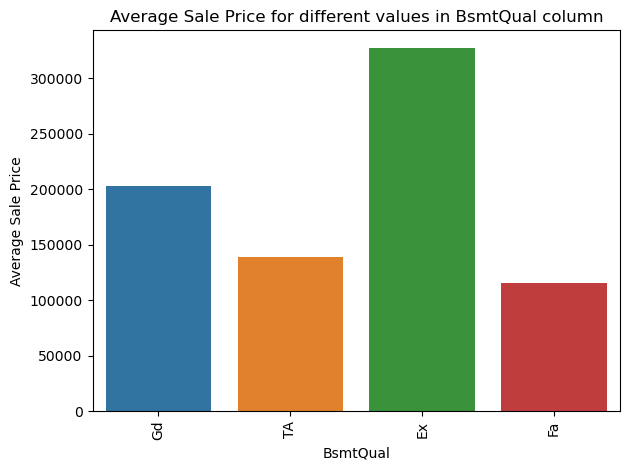

BsmtCond



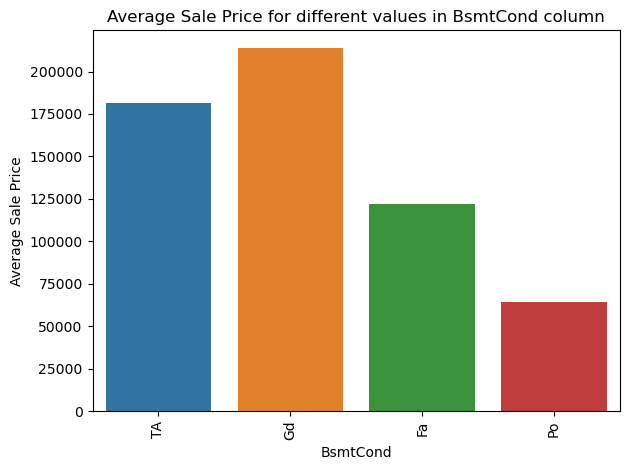

BsmtExposure



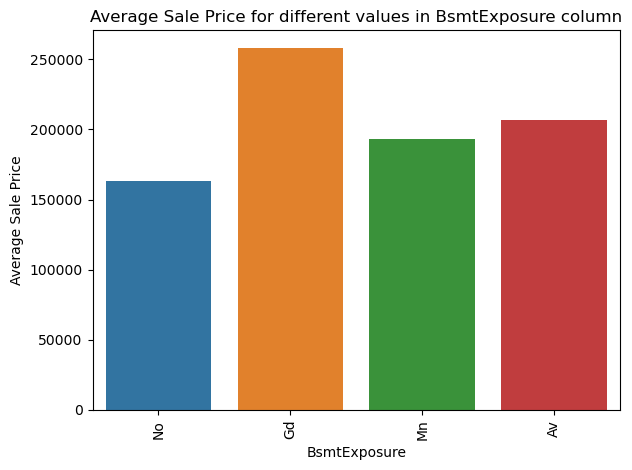

BsmtFinType1



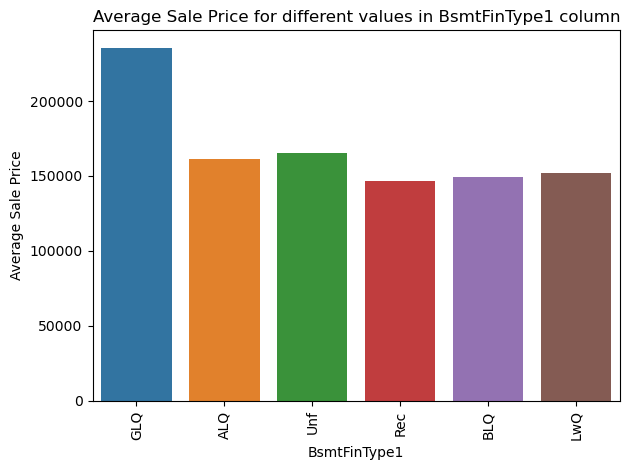

BsmtFinType2



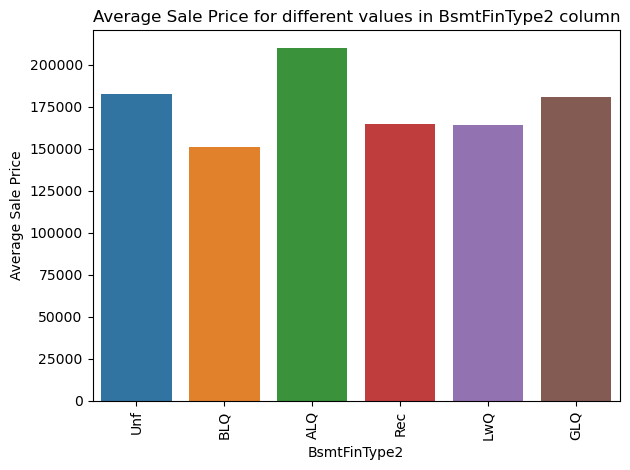

Electrical



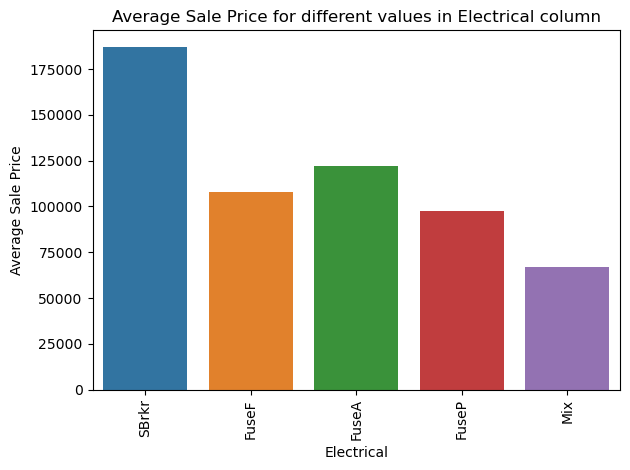

GarageType



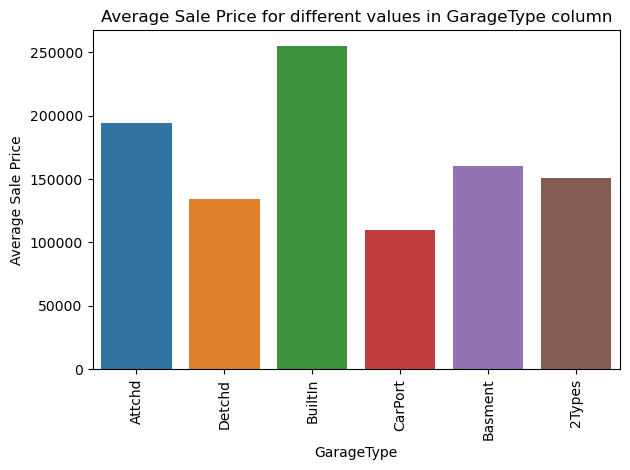

GarageYrBlt



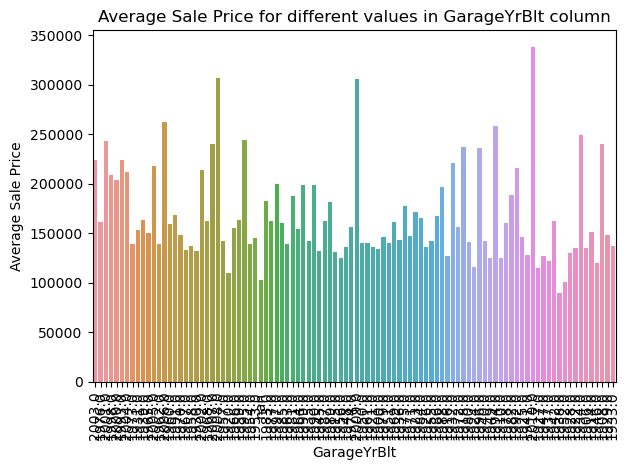

GarageFinish



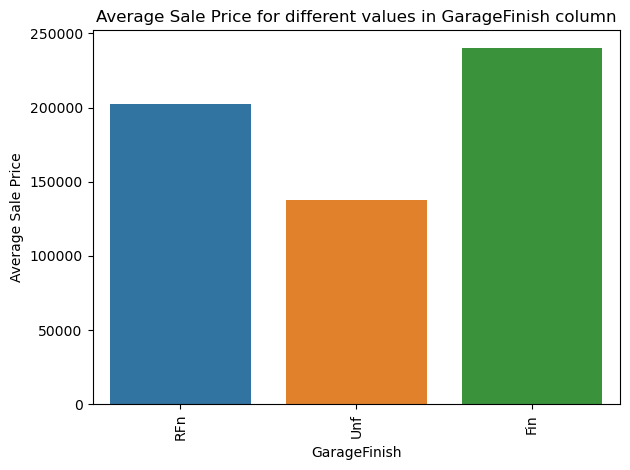

GarageQual



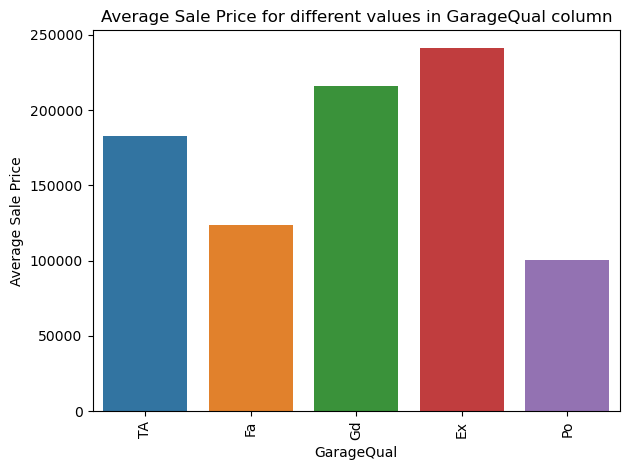

GarageCond



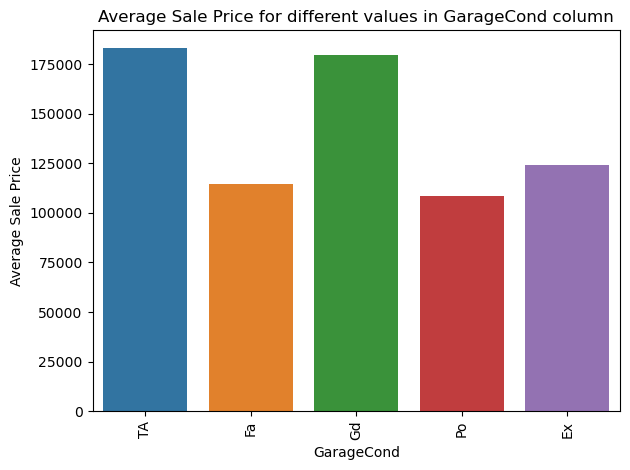

In [16]:
# Visualize the impact of categorical variables on SalePrice
for col in categorical_columns:
    print(f"{col}\n")
    labels = data[col].unique()
    prices = []
    for label in labels:
        price = data.loc[data[col] == label,'SalePrice'].mean()
        prices.append(price)
    sns.barplot(x = labels,y = prices)
    plt.title(f"Average Sale Price for different values in {col} column")
    plt.xlabel(col)
    plt.ylabel('Average Sale Price')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

In [17]:
# Encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [19]:
# Separate features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

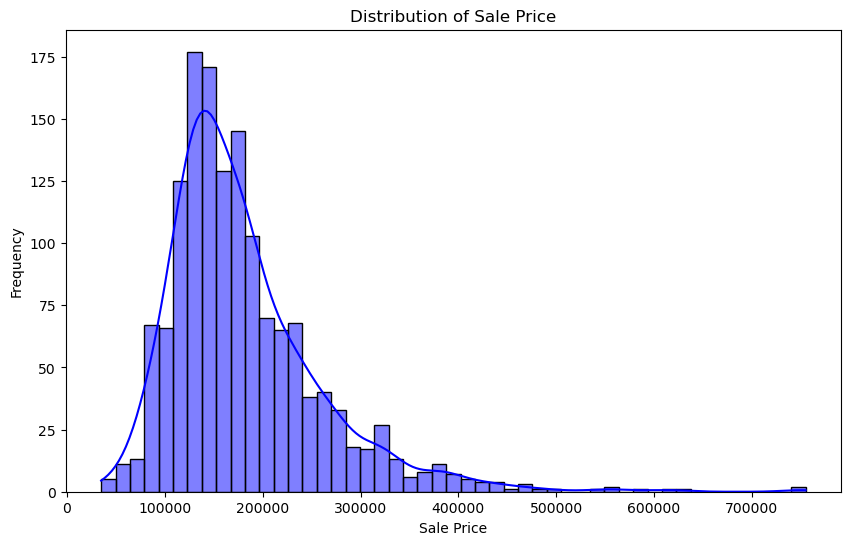

In [20]:
# Calculate the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg_model.predict(X_test)

In [22]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1183705390.8474026


In [23]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

R-squared (R2): 0.8456773077345439


In [24]:
# Create and train the Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

# Evaluate the model
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
print(f"Gradient Boosting Regression Mean Squared Error: {gradient_boosting_mse}")

Gradient Boosting Regression Mean Squared Error: 841530156.2766242


In [25]:
# Calculate R-squared
gb_r2 = r2_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting R-squared (R2):", gb_r2)

Gradient Boosting R-squared (R2): 0.8902875661939765
